In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('excel/employee.csv')
traveller = df[(df['BusinessTravel']=='Travel_Frequently')]
traveller.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
26,32,Yes,Travel_Frequently,1125,Research & Development,16,1,Life Sciences,1,33,...,2,80,0,10,5,3,10,2,6,7


In [111]:
females = df[(df['BusinessTravel']=='Travel_Frequently') & (df['Gender']=='Female')] 
females['Gender'].head()

3     Female
26    Female
39    Female
44    Female
55    Female
Name: Gender, dtype: object

In [3]:
#Can't figure out the "or" condition
#single = df[(df['BusinessTravel']=='Travel_Frequently') & (df['MaritalStatus']=={'Single'} | {'Divorced'})]
#single

In [113]:
single = traveller[(traveller['MaritalStatus']!='Married')]
single[['BusinessTravel','MaritalStatus']].head()

,BusinessTravel,MaritalStatus
5,Travel_Frequently,Single
8,Travel_Frequently,Single
26,Travel_Frequently,Single
43,Travel_Frequently,Single
44,Travel_Frequently,Single


In [114]:
single['mstatus'] = single['MaritalStatus'].replace({'Divorced' : 'single'})
single[['BusinessTravel','mstatus']].head()

/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,BusinessTravel,mstatus
5,Travel_Frequently,Single
8,Travel_Frequently,Single
26,Travel_Frequently,Single
43,Travel_Frequently,Single
44,Travel_Frequently,Single


In [6]:
bins = [15, 20, 30, 40, 50, 60, 70]
single['ageFilter'] = pd.cut(df['Age'], bins = bins)
single[['ageFilter', 'Age']].sort_values(by='ageFilter')


/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ageFilter,Age
776,"(15, 20]",20
1153,"(15, 20]",18
171,"(15, 20]",19
102,"(15, 20]",20
457,"(15, 20]",18
278,"(20, 30]",26
1170,"(20, 30]",27
1332,"(20, 30]",29
1317,"(20, 30]",27
800,"(20, 30]",28


In [7]:
jobSatisfaction=['Hating my job','Not happy','Happy','Very happy']
chart=pd.crosstab(df['JobSatisfaction'], 'pcs')
chart.index=jobSatisfaction
chart.columns.name='JobSatisfaction'
chart['%']=chart/chart.sum()
chart.style.format({'%': '{:.2%}'})

JobSatisfaction,pcs,%
Hating my job,289,19.66%
Not happy,280,19.05%
Happy,442,30.07%
Very happy,459,31.22%


Text(0, 0.5, 'Scale Of Happiness')

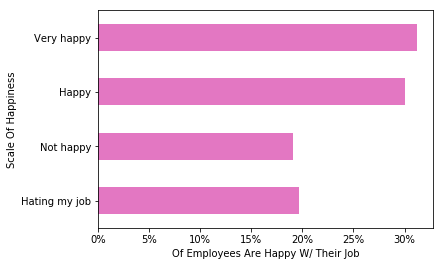

In [8]:
chart2 = chart['%'].plot.barh(color = 'C6')
vals = chart2.get_xticks()
chart2.set_xticklabels(['{:.0%}'.format(x) for x in vals])
plt.xlabel('Of Employees Are Happy W/ Their Job')
plt.ylabel('Scale Of Happiness')

In [97]:
'''
chart2 = chart['%'].plot.barh(color = 'C6')
vals = chart2.get_xticks()
chart2.set_xticklabels(['{:.0%}'.format(x) for x in vals])
plt.xlabel('Of Employees Are Happy W/ Their Job')
plt.ylabel('Scale Of Happiness')


def label_bars(ax, bars, text_format, **kwargs):
    """
    Attaches a label on every bar of a regular or horizontal bar chart
    """
    ys = [bar.get_y() for bar in bars]
    y_is_constant = all(y == ys[0] for y in ys)  # -> regular bar chart, since all all bars start on the same y level (0)

    if y_is_constant:
        _label_bar(ax, bars, text_format, **kwargs)
    else:
        _label_barh(ax, bars, text_format, **kwargs)
'''

'\nchart2 = chart[\'%\'].plot.barh(color = \'C6\')\nvals = chart2.get_xticks()\nchart2.set_xticklabels([\'{:.0%}\'.format(x) for x in vals])\nplt.xlabel(\'Of Employees Are Happy W/ Their Job\')\nplt.ylabel(\'Scale Of Happiness\')\n\n\ndef label_bars(ax, bars, text_format, **kwargs):\n    """\n    Attaches a label on every bar of a regular or horizontal bar chart\n    """\n    ys = [bar.get_y() for bar in bars]\n    y_is_constant = all(y == ys[0] for y in ys)  # -> regular bar chart, since all all bars start on the same y level (0)\n\n    if y_is_constant:\n        _label_bar(ax, bars, text_format, **kwargs)\n    else:\n        _label_barh(ax, bars, text_format, **kwargs)\n'

In [100]:
#Values for every bar!!!!!
chart3=print(str(chart['pcs'].to_string(index=False)))
chart3

289
280
442
459


In [96]:
'''
chart2 = chart['%'].plot.barh(color = 'C6')
vals = chart2.get_xticks()
y=(289,280,442,459)
chart2.set_xticklabels(['{:.0%}'.format(x) for x in vals])
plt.xlabel('Of Employees Are Happy W/ Their Job')
plt.ylabel('Scale Of Happiness')

def autolabel(rects):
    Attach a text label above each bar displaying its height
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
'''

"\nchart2 = chart['%'].plot.barh(color = 'C6')\nvals = chart2.get_xticks()\ny=(289,280,442,459)\nchart2.set_xticklabels(['{:.0%}'.format(x) for x in vals])\nplt.xlabel('Of Employees Are Happy W/ Their Job')\nplt.ylabel('Scale Of Happiness')\n\ndef autolabel(rects):\n    Attach a text label above each bar displaying its height\n    for rect in rects:\n        height = rect.get_height()\n        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,\n                '%d' % int(height),\n                ha='center', va='bottom')\n\nautolabel(rects1)\n"

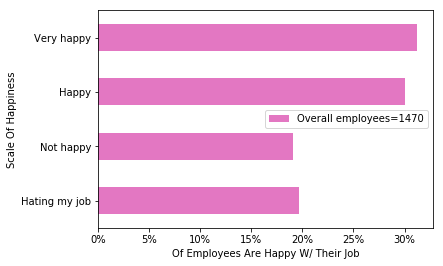

In [99]:
chart2 = chart['%'].plot.barh(color = 'C6')
vals = chart2.get_xticks()
chart2.set_xticklabels(['{:.0%}'.format(x) for x in vals])
plt.xlabel('Of Employees Are Happy W/ Their Job')
plt.ylabel('Scale Of Happiness')
y="Overall employees=1470"
chart2.legend([y])


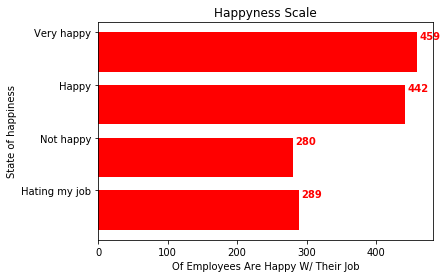

In [109]:
x = [u'Hating my job', u'Not happy', u'Happy', u'Very happy']
y = [289,280,442,459]

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="#ff0000")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Happyness Scale')
plt.xlabel('Of Employees Are Happy W/ Their Job')
plt.ylabel('State of happiness')      
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='#ff0000', fontweight='bold')
plt.show()